# **P-Value: Comprehensive Guide to Understand, Apply and Interpret**

A p-value (probability value) is a statistical measure used in hypothesis testing to help decide whether the results of an experiment are meaningful or likely due to random chance.

It represents the probability of observing results as extreme as the ones obtained assuming the null hypothesis is true. In simple terms it answers the question “If nothing unusual is happening, how surprising are these results?”

- A small p-value means the observed results are unlikely to occur by chance alone providing strong evidence against the null hypothesis.
- A large p-value suggests the results are consistent with random variation and do not provide enough evidence to reject the null hypothesis.

The p-value is computed from a test statistic which is calculated using sample data and a specific statistical test.

# How to Calculate P-Value
The p-value measures how well the observed data agrees with the null hypothesis. It represents the probability of obtaining the observed result or a more extreme one assuming the null hypothesis is true.

1. State the Null Hypothesis (H0): Start by defining the null hypothesis, which assumes there is no effect, difference, or relationship in the population and serves as the baseline for analysis.
2. Choose the Alternative Hypothesis (H1): Specify the alternative hypothesis, stating the expected effect or difference and whether the test is one- or two-tailed.
3. Select the Test and Calculate the Test Statistic: Choose a suitable statistical test and compute the test statistic to measure how far the observed result deviates from the null hypothesis.
4. Determine the Sampling Distribution: Assuming the null hypothesis is true, the test statistic follows a known probability distribution (e.g., t, normal, chi-square, or F), often depending on sample size and degrees of freedom.
5. Calculate the P-Value: The p-value is the probability of observing a test statistic as extreme as the obtained one, equal to the area in the relevant tail(s) of the sampling distribution.
6. Make a Decision: Compare the p-value to a predetermined significance level (α)

# Statistical Tests Used in P-Value Calculation
- Z-Test: Tests whether a sample mean differs from the population mean when the sample size is large or population variance is known.
- T-Test: Determines whether there is a significant difference between group means when the sample size is small or variance is unknown.
- Chi-Square Test: Checks whether categorical variables are independent or follow an expected distribution.
- F-Test: Compares variances or means across multiple groups to identify significant differences.
- Correlation Test: Tests whether a statistically significant linear relationship exists between variables.

# Calculating P-Value Using Two-Sample T-Test
Suppose a researcher wants to investigate whether there is a significant difference in mean height between males and females in a university population.

Data:
- Group 1 (Males): n1=30, x1=175, s1 =5
- Group 2 (Females): n2=35, x2=168, s2=6

1. Null Hypothesis (H0): There is no significant difference in mean height between males and females.

2. Alternative Hypothesis (H1): There is a significant difference in mean height between males and females.

3. Test Statistic: For two independent samples, the two-sample t-test is used:

![alt text](../Imports/image.png)

4. Distribution and Degrees of Freedom: The t-distribution is used for small samples or unknown population standard deviation.

![alt text](../Imports/image2.png)

The t-distribution is symmetric and bell-shaped similar to the normal distribution. As the degrees of freedom increase the t-distribution approaches the shape of the standard normal distribution. Practically it affects the critical values used to determine statistical significance and confidence intervals.

5. P-Value Calculation
The p-value for a two-tailed test is calculated using the t-distribution.

5. Decision Rule

At a significance level of α = 0.05

- If p-value ≤ α reject H0
- If p-value >α fail to reject ​H0
Since the p-value is much smaller than 0.05, the null hypothesis is rejected.

In [1]:
import scipy.stats as stats

t_statistic = 5.13
degrees_of_freedom = 63

p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))
print("P value:", p_value)

P value: 2.9918663893013786e-06


# Step By Step Implementation
Here in this code we calculate a one-sample t-test and visualize the sample data along with the t-distribution.

Step 1: Import Required Libraries
- import numpy is used for numerical calculations like mean and standard deviation.
- import scipy.stats provides statistical functions like t-tests.
- import matplotlib.pyplot is used for visualizing data using histograms and plots.

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Step 2: Define Sample Data and Population Mean
- population_mean is the hypothesized mean under the null hypothesis (H0).
- alpha is the significance level, typically 0.05 for 95% confidence.

In [3]:
sample_data = [78, 82, 88, 95, 79, 92, 85, 88, 75, 80]
population_mean = 85  
alpha = 0.05

Step 3: Calculate Sample Statistics
- Compute the sample mean using np.mean().
- Compute the sample standard deviation using np.std() with ddof=1 for unbiased estimate.
- Get the sample size using len().

In [4]:
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1) 
sample_size = len(sample_data)

print(f"Sample Mean = {sample_mean}")
print(f"Sample Standard Deviation = {sample_std}")
print(f"Sample Size = {sample_size}")

Sample Mean = 84.2
Sample Standard Deviation = 6.4944420682440285
Sample Size = 10


Step 4: Perform One-Sample t-Test
- A one-sample t-test checks if the sample mean is significantly different from the population mean.
- stats.ttest_1samp() calculates the t-statistic and the p-value.
- t-statistic measures how many standard errors the sample mean is away from the population mean.
- p-value tells us whether to reject the null hypothesis.

In [5]:
t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)

print("\n--- One-Sample t-Test ---")
print("t-statistic:", t_stat)
print("p-value:", p_value)


--- One-Sample t-Test ---
t-statistic: -0.3895364838967159
p-value: 0.7059365203154573


Step 5: Visualize Sample Data with Histogram
- Create a histogram to see the distribution of sample data.
- Add vertical lines for population mean (H0) and sample mean for comparison.
- Helps visually understand how close the sample mean is to the hypothesized mean.

The histogram shows that the sample mean (green line) is very close to the population mean (red dashed line), indicating that the observed difference is small. This small difference corresponds to a relatively high p-value, suggesting there is insufficient evidence to reject the null hypothesis.

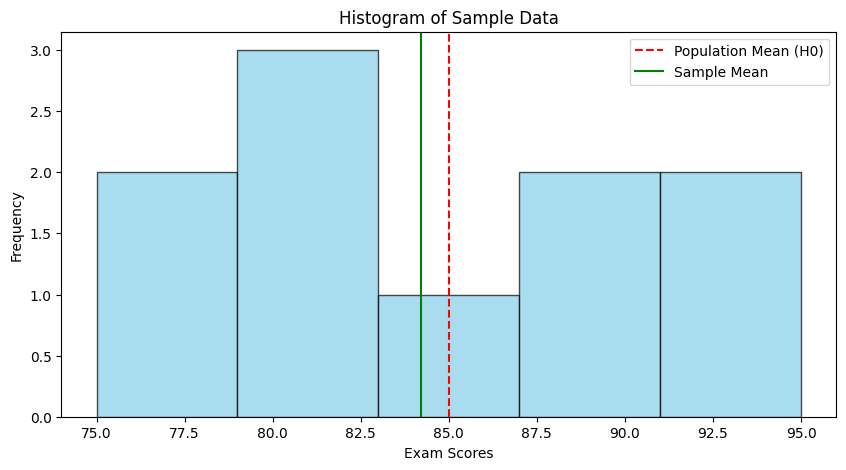

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(sample_data, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='--', label='Population Mean (H0)')
plt.axvline(sample_mean, color='green', linestyle='-', label='Sample Mean')
plt.title('Histogram of Sample Data')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Step 6: Plot t-Distribution and Highlight p-value Area
- Degrees of freedom for one-sample t-test is df = sample_size - 1.
- Generate x-values and compute the t-distribution PDF.
- Highlight the areas corresponding to the p-value (both tails for two-tailed test).
- Add lines for t-statistic to see its position on the t-distribution.

The plot shows the t-distribution under the null hypothesis, with the shaded regions representing the p-value corresponding to the observed t-statistic.

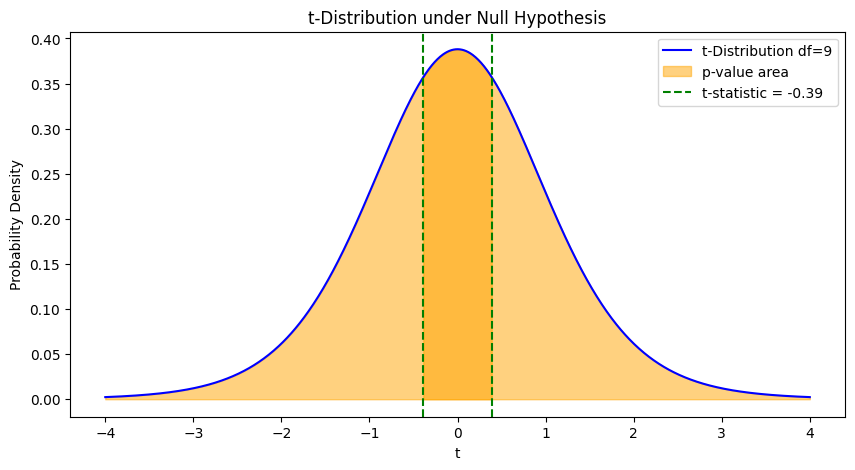

In [7]:
df = sample_size - 1 
x = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(x, df)

plt.figure(figsize=(10, 5))
plt.plot(x, t_dist, label=f't-Distribution df={df}', color='blue')
plt.fill_between(x, 0, t_dist, where=(x >= t_stat), color='orange', alpha=0.5, label='p-value area')
plt.fill_between(x, 0, t_dist, where=(x <= -t_stat), color='orange', alpha=0.5)
plt.axvline(t_stat, color='green', linestyle='--', label=f't-statistic = {t_stat:.2f}')
plt.axvline(-t_stat, color='green', linestyle='--')
plt.title('t-Distribution under Null Hypothesis')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# What Influences P-Value
The p-value in hypothesis testing can be affected by several factors. Understanding these factors is essential for correct interpretation and informed decision-making in hypothesis testing.

- Sample Size: Larger samples usually produce smaller p-values, making it easier to detect significant effects.
- Effect Size: A bigger effect size leads to smaller p-values, indicating stronger evidence against the null hypothesis.
- Variability in Data: Higher variability increases p-values, making it harder to find significance.
- Significance Level: Choosing a lower significance level raises the threshold for considering a p-value significant.
- Choice of Test: Different statistical tests can give different p-values for the same dataset.
- Test Assumptions: Violating assumptions of the statistical test can distort p-values.

# P-value in Hypothesis testing
The table given below shows the importance of p-value and shows the various kinds of errors that occur during hypothesis testing.

![alt text](../Imports/image3.png)

Type I error: Incorrect rejection of the null hypothesis. It is denoted by α(significance level).
Type II error: Incorrect acceptance of the null hypothesis. It is denoted by β (power level)

# Applications
- Feature Selection in Modeling: During model training, p-values help identify variables that significantly impact predictions.
- Medical Research: P-values are widely used to determine whether a drug or treatment has a significant effect on patients.
- Business Decision Making: In business analytics p-values help evaluate whether observed trends or patterns are statistically significant aiding informed decisions.
- Quality Control: P-values are used in manufacturing to check if variations in production are due to random chance or indicate a real problem.
- Social Science Research: Researchers use p-values to confirm if observed effects are significant.

# Advantages
- Provides a quantitative measure of evidence against the null hypothesis.
- Helps make informed decisions in hypothesis testing.
- Widely applicable across fields like medicine, business, and research.
- Facilitates comparison of results across different studies or tests.

Limitations
- Does not measure effect size a small p-value doesn’t guarantee practical significance.
- Can be influenced by sample size, variability, and choice of statistical test.
- Misinterpretation can lead to incorrect conclusions about the alternative hypothesis.
- Provides no information on why an effect occurs, only whether it is statistically significant.